# Initial SETUP

In [3]:
import os 

SETUP = {
    'CURR_DIR': os.getcwd(),
    'DEBUG': True,
    'DEBUG_EPISODES': 2,
    'EPISODES': 200,
}

try:
  import google.colab
  SETUP['IN_COLAB'] = True
except: SETUP['IN_COLAB'] = False

SUBVERSION = "v1.0.0"
SPECIFIC_RUN = 'SimpleCNN'
VERSION_KEY = 'BananaNavigation'

SETUP['RUN-KEY'] = "_".join([SUBVERSION, SPECIFIC_RUN, VERSION_KEY]) + '_'

In [5]:
from pathlib import Path

if SETUP['IN_COLAB']:
    from google.colab import drive
    drive.mount('/content/drive')
    SETUP['PATH'] = Path("/content/gdrive/drive/_Colab/RL-SmartAgent-BananaGame")
    !cd '/content/drive/MyDrive/_Colab/RL-SmartAgent-BananaGame/python'; pip install .
else: SETUP['PATH'] = Path(".")

SETUP['BANANA_PATH'] = str(SETUP['PATH'] / 'Banana_Linux') if SETUP['IN_COLAB'] else str(SETUP['PATH'] / "Banana.app")

Mounted at /content/drive
Processing /content/drive/MyDrive/_Colab/RL-SmartAgent-BananaGame/python
     |████████████████████████████████| 389kB 14.0MB/s 
     |████████████████████████████████| 14.2MB 24.8MB/s 
  Created wheel for unityagents: filename=unityagents-0.4.0-cp37-none-any.whl size=71618 sha256=8fdf8d8a08adaeee44ed01c31422228d6c7d01948176023ff5f18fef432b3034
  Stored in directory: /tmp/pip-ephem-wheel-cache-geag2ynl/wheels/58/b8/ad/0c7824bf7709b7a524a1800bbcc00b86e42209f8ab9ceff0de
  Created wheel for grpcio: filename=grpcio-1.11.0-cp37-cp37m-linux_x86_64.whl size=8149401 sha256=971f2730cef4991a72eec0a47a364a63230864bc2aa4924769e62166ad2fc35b
  Stored in directory: /root/.cache/pip/wheels/7a/4d/01/a95c6771206069e123e2d9f496bc72693f4801bae091dd83df
Successfully built unityagents grpcio
ERROR: tensorflow 2.5.0 has requirement grpcio~=1.34.0, but you'll have grpcio 1.11.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement protobuf>=3.9.2, but you'll have protobuf 3

# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment
import unityagents
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [ ]:
!pip install mlagents


In [6]:
from mlagents_envs.registry import default_registry
[k for k, v in default_registry.items()]

ModuleNotFoundError: ignored

In [6]:
#env = default_registry["Banan"].make()
env = UnityEnvironment(file_name='/content/drive/MyDrive/_Colab/RL-SmartAgent-BananaGame/Banana_Linux/Banana.x86')

UnityTimeOutException: ignored

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

print(brain_name, "\n\n\n",brain)

BananaBrain 


 Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

    The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
import time

start = time.time()
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    #print(env_info.vector_observations)
    print(f'\rscore: {score:<5}',end='')
    if done: 
        print(f'\nend of episode {time.time()-start:.3f} seg') # exit loop if episode finished
        break
    
print("Final Score: {}".format(score))

score: 0.0  
end of episode 30.048 seg
Final Score: 0.0


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [ ]:
from agent import Agent
from collections import deque
import torch

PASSING_SCORE = 13
agent = Agent(state_size=state_size, action_size=action_size, seed=32,  fc1_units=32, 
              fc2_units=32)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        #state = env.reset()
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):<4.2f}', end="")
        if i_episode % 100 == 0:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):<4.2f}')
        if np.mean(scores_window)>=PASSING_SCORE:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
        
    return scores

scores = dqn()

Episode 100	Average Score: 0.35
Episode 200	Average Score: 3.63
Episode 300	Average Score: 7.29
Episode 400	Average Score: 10.11
Episode 494	Average Score: 13.01
Environment solved in 394 episodes!	Average Score: 13.01


First time reaches target: 194; maximum score: 24.0


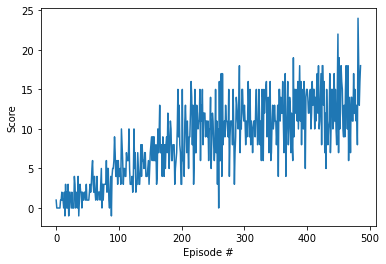

In [ ]:
import matplotlib.pyplot as plt
print(f'First time reaches target: {np.where(np.array(scores) > PASSING_SCORE)[0][0]}; maximum score: {max(scores)}')
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

First time reaches target: 249; maximum score: 23.0


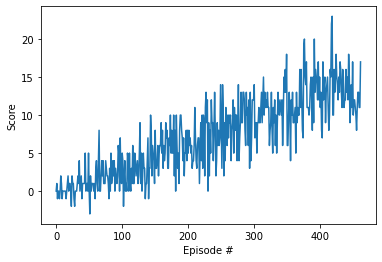

In [ ]:
import matplotlib.pyplot as plt
print(f'First time reaches target: {np.where(np.array(scores) > PASSING_SCORE)[0][0]}; maximum score: {max(scores)}')
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()